<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [2]:
# imports
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

C:\Users\conno\.virtualenvs\DS-Unit-4-Sprint-1-NLP-Y17kEYKC\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
df = pd.read_csv('./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [4]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [5]:
df['categories'].nunique()

60

In [6]:
def lemmatize(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [7]:
df['lemmas'] = df['reviews.text'].apply(lemmatize)

In [8]:
df['lemmas'].head()

0    [order, 3, item, bad, quality, miss, backup, s...
1                [Bulk, expensive, way, product, like]
2                             [Duracell, price, happy]
3                  [work, brand, battery, well, price]
4                  [battery, long, last, price, great]
Name: lemmas, dtype: object

In [9]:
id2word = corpora.Dictionary(df['lemmas'])

In [10]:
# Let's remove extreme values from the dataset
id2word.filter_extremes(no_below=5, no_above=0.95)

In [11]:
len(id2word.keys())

3082

In [12]:
corpus = [id2word.doc2bow(text) for text in df['lemmas']]

In [13]:
# choosing topic number equal to number of categories
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 9,
                   passes=10,
                   workers=4
                  )

In [14]:
lda.print_topics()

[(0,
  '0.033*"tablet" + 0.026*"book" + 0.025*"app" + 0.024*"great" + 0.021*"read" + 0.019*"use" + 0.018*"game" + 0.018*"Amazon" + 0.014*"play" + 0.014*"movie"'),
 (1,
  '0.202*"great" + 0.103*"price" + 0.071*"work" + 0.060*"product" + 0.051*"good" + 0.025*"buy" + 0.023*"value" + 0.016*"tablet" + 0.016*"deal" + 0.015*"recommend"'),
 (2,
  '0.065*"love" + 0.051*"tablet" + 0.047*"kid" + 0.035*"old" + 0.033*"year" + 0.029*"buy" + 0.023*"great" + 0.020*"game" + 0.018*"use" + 0.017*"app"'),
 (3,
  '0.047*"Kindle" + 0.033*"read" + 0.021*"love" + 0.020*"light" + 0.018*"kindle" + 0.017*"like" + 0.017*"book" + 0.014*"screen" + 0.014*"buy" + 0.014*"wife"'),
 (4,
  '0.038*"charge" + 0.020*"device" + 0.019*"day" + 0.012*"buy" + 0.012*"problem" + 0.011*"2" + 0.011*"hour" + 0.010*"time" + 0.010*"month" + 0.009*"come"'),
 (5,
  '0.073*"tablet" + 0.039*"good" + 0.028*"use" + 0.022*"nice" + 0.020*"Amazon" + 0.015*"easy" + 0.013*"buy" + 0.013*"like" + 0.012*"price" + 0.010*"screen"'),
 (6,
  '0.146*"bat

In [15]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]

In [16]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
tablet book app great read

------ Topic 1 ------
great price work product good

------ Topic 2 ------
love tablet kid old year

------ Topic 3 ------
Kindle read love light kindle

------ Topic 4 ------
charge device day buy problem

------ Topic 5 ------
tablet good use nice Amazon

------ Topic 6 ------
battery good long brand price

------ Topic 7 ------
battery buy use Amazon work

------ Topic 8 ------
easy use love screen kindle



In [17]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [18]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

C:\Users\conno\.virtualenvs\DS-Unit-4-Sprint-1-NLP-Y17kEYKC\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.150752  0.073898       1        1  16.900084
6      0.266906 -0.022485       2        1  13.747086
0     -0.117183  0.068898       3        1  13.420558
7      0.141296 -0.193453       4        1  12.633738
3     -0.139646 -0.018109       5        1   9.861982
5     -0.013701  0.057235       6        1   9.645444
1      0.198451  0.244976       7        1   8.202705
4     -0.014018 -0.215844       8        1   8.036152
8     -0.171353  0.004884       9        1   7.552251, topic_info=     Category         Freq           Term        Total  loglift  logprob
3     Default  9416.000000        battery  9416.000000  30.0000  30.0000
19    Default  8974.000000          great  8974.000000  29.0000  29.0000
16    Default  5111.000000          price  5111.000000  28.0000  28.0000
2074  Default  7408.000000         tablet  7408.000000  27.0000  27.0000
84    Default  5989.000000           love  5989.000000  26.0000  26.0000
31    Default  6779.000000           good  6779.000000  25.0000  25.0000
9     Default  4381.000000           work  4381.000000  24.0000  24.0000
168   Default  2750.000000            kid  2750.000000  23.0000  23.0000
30    Default  3246.000000           easy  3246.000000  22.0000  22.0000
12    Default  2351.000000        product  2351.000000  21.0000  21.0000
21    Default  2633.000000           long  2633.000000  20.0000  20.0000
17    Default  2051.000000          brand  2051.000000  19.0000  19.0000
2346  Default  1796.000000         Kindle  1796.000000  18.0000  18.0000
706   Default  2081.000000           read  2081.000000  17.0000  17.0000
201   Default  1034.000000         charge  1034.000000  16.0000  16.0000
482   Default  2463.000000            old  2463.000000  15.0000  15.0000
1109  Default  1844.000000           book  1844.000000  14.0000  14.0000
88    Default  4787.000000            use  4787.000000  13.0000  13.0000
1343  Default  2258.000000            app  2258.000000  12.0000  12.0000
1796  Default  1427.000000         kindle  1427.000000  11.0000  11.0000
160   Default  1890.000000           game  1890.000000  10.0000  10.0000
96    Default  2243.000000           year  2243.000000   9.0000   9.0000
1446  Default  1699.000000         screen  1699.000000   8.0000   8.0000
367   Default   954.000000          value   954.000000   7.0000   7.0000
907   Default   981.000000       daughter   981.000000   6.0000   6.0000
712   Default  1122.000000           fire  1122.000000   5.0000   5.0000
384   Default  1492.000000           play  1492.000000   4.0000   4.0000
83    Default   987.000000          light   987.000000   3.0000   3.0000
2390  Default   709.000000          movie   709.000000   2.0000   2.0000
55    Default  1158.000000           life  1158.000000   1.0000   1.0000
...       ...          ...            ...          ...      ...      ...
712    Topic9   478.990906           fire  1122.231201   1.7319  -3.9122
1446   Topic9   649.960144         screen  1699.937988   1.6219  -3.6070
214    Topic9   329.366730              8   760.616089   1.7464  -4.2867
1337   Topic9    62.955299  entertainment   105.845604   2.0638  -5.9415
2353   Topic9   190.978561             HD   419.937134   1.7954  -4.8317
464    Topic9   352.548492            set   918.833496   1.6254  -4.2187
218    Topic9   378.451508            new  1056.163696   1.5570  -4.1478
1396   Topic9    57.223747     understand    98.726059   2.0379  -6.0369
88     Topic9  1026.105469            use  4787.146484   1.0432  -3.1504
847    Topic9    32.035969       numerous    48.384750   2.1710  -6.6170
84     Topic9  1020.044006           love  5989.316895   0.8132  -3.1563
1728   Topic9   218.533066        feature   756.228027   1.3419  -4.6970
151    Topic9   459.886444           time  2409.516113   0.9271  -3.9529
907    Topic9   223.145264       daughter   981.643921   1.1019  -4.6761
1324 

In [19]:
distro = [lda[d] for d in corpus]

def update(doc):
        d_dist = {k:0 for k in range(0,9)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [21]:
df2 = pd.DataFrame.from_records(new_distro)
df2.columns = topics
df2['category'] = df['primaryCategories']

In [22]:
df2.head()

,tablet book app great read,great price work product good,love tablet kid old year,Kindle read love light kindle,charge device day buy problem,tablet good use nice Amazon,battery good long brand price,battery buy use Amazon work,easy use love screen kindle,category
0,0.010102,0.471418,0.010105,0.010104,0.010108,0.010110,0.010115,0.457829,0.010106,Health & Beauty
1,0.022232,0.211494,0.022232,0.022242,0.022239,0.022239,0.632846,0.022242,0.022236,Health & Beauty
2,0.027781,0.422317,0.027781,0.027782,0.027781,0.027783,0.383194,0.027799,0.027783,Health & Beauty
3,0.018520,0.018535,0.018519,0.018523,0.018519,0.018523,0.851817,0.018524,0.018521,Health & Beauty
4,0.018522,0.021684,0.018522,0.018519,0.018520,0.018520,0.848671,0.018522,0.018520,Health & Beauty


In [23]:
df2.groupby('category').mean()

,tablet book app great read,great price work product good,love tablet kid old year,Kindle read love light kindle,charge device day buy problem,tablet good use nice Amazon,battery good long brand price,battery buy use Amazon work,easy use love screen kindle
category,,,,,,,,,
Animals & Pet Supplies,0.010187,0.221846,0.010188,0.240692,0.062104,0.010188,0.128098,0.148824,0.141404
Electronics,0.162940,0.107102,0.241053,0.113014,0.054439,0.132727,0.030886,0.025052,0.116052
"Electronics,Furniture",0.307186,0.000000,0.000000,0.000000,0.000000,0.055558,0.026619,0.000000,0.569259
"Electronics,Media",0.042108,0.053789,0.019073,0.530237,0.090669,0.073560,0.052997,0.027493,0.092637
Health & Beauty,0.026874,0.215299,0.037630,0.029565,0.054349,0.040443,0.379694,0.176047,0.031215
Home & Garden,0.033341,0.033336,0.149487,0.033351,0.033355,0.033350,0.235667,0.164835,0.283279
Office Supplies,0.209457,0.367749,0.023516,0.023519,0.023514,0.146854,0.077652,0.023519,0.104220
"Office Supplies,Electronics",0.118581,0.098020,0.075152,0.339760,0.044418,0.109004,0.036451,0.029823,0.132819
"Toys & Games,Electronics",0.067653,0.061621,0.570439,0.035533,0.066969,0.063340,0.022020,0.021221,0.072993


In [24]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [25]:

import warnings; warnings.simplefilter('ignore')

coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus,
                                                        start=2, 
                                                        limit=40, 
                                                        step=6,
                                                        passes=40)

In [26]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

In [27]:
topic_coherence.head()

,coherence_score,num_topics,pass
0,-2.281045,2,0
1,-2.403499,8,0
2,-2.473314,14,0
3,-2.567402,20,0
4,-2.590729,26,0


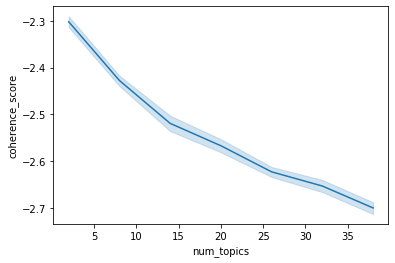

In [28]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling